In [75]:
import os
import re
import torch
import pickle
# import random
import numpy as np
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

In [77]:
# data path etc
embeddings_path = "/Users/zacharykaras/Desktop/Classes/DataCentricAI/embeddings_3e_weighted_binary"
embedding_files = os.listdir(embeddings_path)
# embedding_files.remove('.DS_Store')

In [78]:
# rand_indexes = random.sample(range(1,20821), 1000)

# embedding_sample = []
# for idx in rand_indexes:
#     filepath = f"{embeddings_path}/{embedding_files[idx]}"
#     matrix = np.load(filepath)
#     embedding_sample.append(matrix)
# embedding_sample = torch.Tensor(embedding_sample)
embeddings = []
for i in range(len(embedding_files)):
    filepath = f"{embeddings_path}/{embedding_files[i]}"
    matrix = np.load(filepath)
    averaged = matrix.mean(axis=0)
    embeddings.append(averaged)
    # break

In [79]:
embeddings = torch.Tensor(embeddings)

In [80]:
# plot loss
pickle_path = f"/Users/zacharykaras/Desktop/Classes/DataCentricAI/collected_loss_3epochs_weighted_binary.pkl"
with open(pickle_path, 'rb') as f:
    recorded_loss = pickle.load(f)

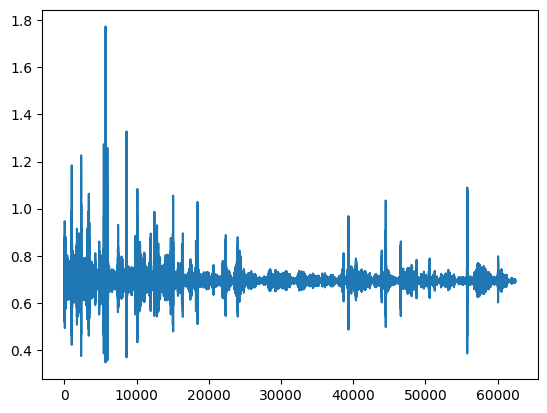

In [81]:
plt.plot(recorded_loss)

In [7]:
# print(embedding_sample.mean(dim=2), embedding_sample.std(dim=2))

In [83]:
# get labels
labels = []
for file in embedding_files:
    parts = re.split('_', file)
    last_part = parts[2]
    class_num = re.split('\.', last_part)[0]
    just_num = int(re.sub('class', '', class_num))+1
    labels.append(just_num)

/Users/zacharykaras/base/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


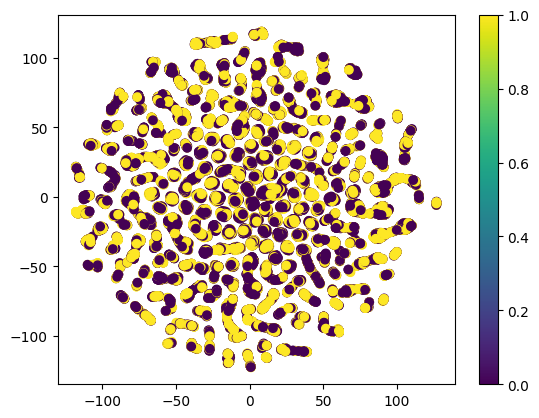

In [85]:

# from matplotlib import pyplot as plt
tsne = TSNE(n_components=2)
# embedding_sample_2d = embeddin.mean(dim=1)
reduced_embeddings = tsne.fit_transform(embeddings.numpy())
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
plt.colorbar()
plt.show()

In [86]:
distances = cdist(embeddings, embeddings)
# print(distances)

<Axes: >

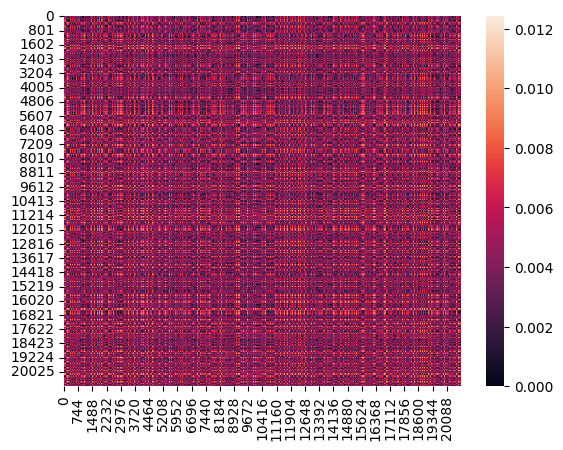

In [87]:
import seaborn as sns
sns.heatmap(distances)

In [88]:
# Assuming `dist_matrix` is your distance matrix
row_sums = np.sum(distances, axis=1)
row_means = np.mean(distances, axis=1)

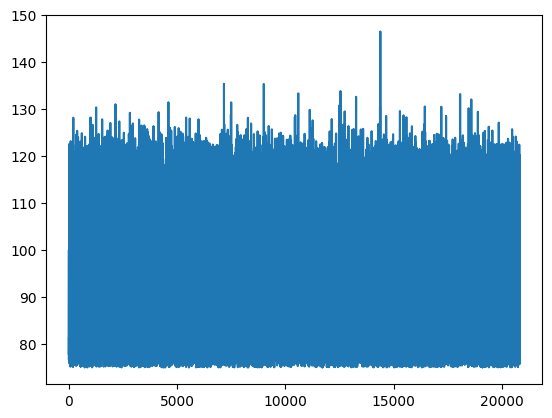

In [89]:
plt.plot(list(row_sums))

In [91]:
threshold = 2000
outlier_indices = np.where(row_sums > threshold)[0]
clean_embeddings = np.delete(embeddings, outlier_indices, axis=0)
clean_distances = cdist(clean_embeddings, clean_embeddings)

In [92]:
print(len(outlier_indices), outlier_indices)

0 []


<Axes: >

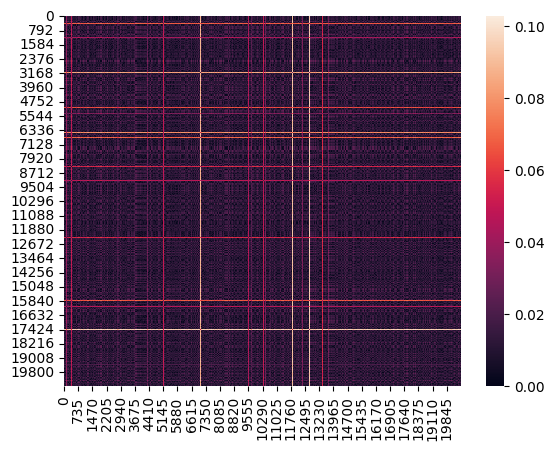

In [19]:
sns.heatmap(clean_distances)

In [93]:
# saving tensors
# save clean embeddings
torch.save(clean_embeddings, '../clean_embeddings_binary.pt')
# filter labels by outlier indices then save
label_tensor = torch.Tensor(labels)
clean_labels = np.delete(label_tensor, outlier_indices, axis=0)
torch.save(clean_labels, '../clean_labels_binary.pt')

In [33]:
import json
mappings_dir = "../mappings/"
with open(os.path.join(mappings_dir, "level1_mapping.json"), "r") as f:
        activity_labels = json.load(f)
with open(os.path.join(mappings_dir, "stim_file_mapping.json"), "r") as f:
        folder_mapping = json.load(f)
        folder_mapping = {v:k for k,v in folder_mapping.items()}

In [71]:
clean_label_ints = [int(el) for el in clean_labels]
# clean_label_names = [folder_mapping[clean_label_ints[el]] for el in clean_labels]
binary_labels = []
for el in clean_label_ints:
    activity = folder_mapping[el+1]
    sport_label = activity_labels[activity]
    sport_ns = 1 if sport_label == 'S' else 0
    binary_labels.append(sport_ns)

In [74]:
binary_labels = torch.Tensor(binary_labels)
torch.save(binary_labels, "../binary_labels.pt")